In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [5]:
data_full=pd.read_csv("Original_2017_full.csv")

In [7]:
data_full.tail()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
1557,Zimbabwe,2013,4.690188,7.565154,0.799274,48.949745,0.575884,-0.076716,0.830937,0.711885,0.182288,0.527755,-1.026085,-1.526321,1.964805,0.418918,NaN,0.432,0.555439
1558,Zimbabwe,2014,4.184451,7.562753,0.765839,50.051235,0.642034,-0.045885,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,NaN,0.432,0.601080
1559,Zimbabwe,2015,3.703191,7.556052,0.735800,50.925652,0.667193,-0.094585,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,NaN,0.432,0.655137
1560,Zimbabwe,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,-0.863044,-1.371214,2.776363,0.743257,NaN,0.432,0.596690
1561,Zimbabwe,2017,3.638300,7.538187,0.754147,52.674484,0.752826,-0.066005,0.751208,0.806428,0.224051,0.682647,NaN,NaN,2.656848,0.730244,NaN,0.432,0.581484


In [9]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   country                                                   1562 non-null   object 
 1   year                                                      1562 non-null   int64  
 2   Life Ladder                                               1562 non-null   float64
 3   Log GDP per capita                                        1535 non-null   float64
 4   Social support                                            1549 non-null   float64
 5   Healthy life expectancy at birth                          1553 non-null   float64
 6   Freedom to make life choices                              1533 non-null   float64
 7   Generosity                                                1482 non-null   float64
 8   Perceptions of cor

In [11]:
new_names = ['country', 'year', 'happiness', 'log_gdp_per_cap', 'social_support', 
             'life_expectancy', 'freedom', 'generosity', 'corruption_perception', 
             'positive_affect', 'negative_affect', 'confidence_in_government', 
             'democratic_quality', 'delivery_quality', 'happiness_sd', 
             'happiness_sd/mean', 'gini_index', 'gini_index 2000-15', 
             'household_income_gini']

In [13]:
## rename variables for better naming convention
data_full.columns = new_names

In [15]:
len(data_full['country'].unique())

164

### We have 164 countries, and it's a lot if we are to look at their trend one by one. Thus, we decided to only look at the trend by major regions.

In [18]:
data_region=pd.read_csv("Original_2017_region.csv")
data_region.head(5)

,country,Region indicator,"Life ladder, 2015-2017","Standard error, life ladder, 2015-2017","Log of GDP per person, 2015-2017","GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Standard error, social support, 2015-2017","Freedom to make life choices, 2015-2017","Standard error, freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Standard error, generosity, 2015-2017","Perceptions of corruption, 2015-2017","Standard error, perceptions of corruption, 2015-2017"
0,Afghanistan,South Asia,3.631519,0.042360,7.462610,1741.687500,52.013329,0.525075,0.011119,0.445294,0.011449,0.179054,0.008331,0.879705,0.006009
1,Albania,Central and Eastern Europe,4.586040,0.055813,9.338126,11363.095700,68.871552,0.639576,0.010078,0.726340,0.009421,0.259975,0.009048,0.886778,0.005775
2,Algeria,Middle East and North Africa,5.294638,0.057087,9.540703,13914.723630,65.604858,0.776977,0.011171,0.439177,0.019161,0.128988,0.012327,0.698343,0.019293
3,Angola,Sub-Saharan Africa,3.794838,0.079919,8.741957,6260.132813,52.460709,0.765275,0.015744,0.374173,0.018346,0.106829,0.011499,0.833540,0.016014
4,Argentina,Latin America and Caribbean,6.387958,0.049497,9.842001,18807.310550,67.398483,0.905565,0.006363,0.853390,0.007526,0.163174,0.007777,0.847882,0.006881


In [20]:
# Merge with dataset that has region indicator
data_allyear=pd.merge(data_full,data_region, on='country').rename(columns={'Region indicator': 'region'})

In [22]:
data_allyear.head()

,country,year,happiness,log_gdp_per_cap,social_support,life_expectancy,freedom,generosity,corruption_perception,positive_affect,...,"GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Standard error, social support, 2015-2017","Freedom to make life choices, 2015-2017","Standard error, freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Standard error, generosity, 2015-2017","Perceptions of corruption, 2015-2017","Standard error, perceptions of corruption, 2015-2017"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,...,1741.6875,52.013329,0.525075,0.011119,0.445294,0.011449,0.179054,0.008331,0.879705,0.006009
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,...,1741.6875,52.013329,0.525075,0.011119,0.445294,0.011449,0.179054,0.008331,0.879705,0.006009
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,...,1741.6875,52.013329,0.525075,0.011119,0.445294,0.011449,0.179054,0.008331,0.879705,0.006009
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,...,1741.6875,52.013329,0.525075,0.011119,0.445294,0.011449,0.179054,0.008331,0.879705,0.006009
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,...,1741.6875,52.013329,0.525075,0.011119,0.445294,0.011449,0.179054,0.008331,0.879705,0.006009


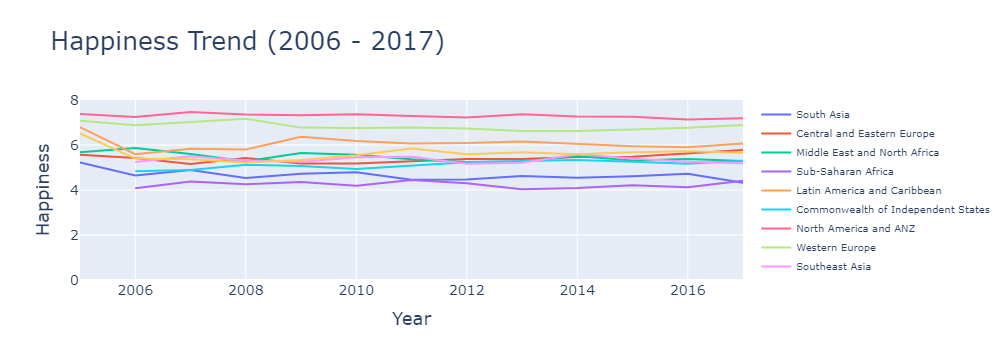

In [25]:
layout = go.Layout(title="Happiness Trend (2006 - 2017)", font=dict(size=18), 
                   xaxis=dict(title='Year', titlefont=dict(size=18), 
                              tickfont=dict(size=14)),
                   yaxis=dict(range=[0, 8], title='Happiness', 
                              titlefont=dict(size=18), tickfont=dict(size=14)),
                   legend=dict(font=dict(size=10)))
fig = {'data': [{'x': data_allyear[data_allyear['region'] == region].groupby('year')
                 .agg({'happiness': 'mean'}).reset_index()['year'],
                 'y': data_allyear[data_allyear['region'] == region].groupby('year')
                 .agg({'happiness': 'mean'}).reset_index()['happiness'],
                 'name': region, 'mode': 'lines', } for region in data_allyear['region'].unique()], 
       'layout': layout}
py.iplot(fig)

### Happiness by Country (2016)¶

In [28]:
data_2016 = data_allyear[data_allyear['year'] == 2016]

In [30]:
data_iso=pd.read_csv("relig_iso.csv")
data_iso.head(5)

,Unnamed: 0,iso,country,gdp_pc,gpi_rank,gpi_score,percentage_non_religious
0,0,AFG,Afghanistan,900,157,3.252,0.00
1,1,AGO,Angola,8200,95,2.105,0.30
2,2,ALB,Albania,8000,66,1.927,8.50
3,3,ARE,United Arab Emirates,49600,46,1.785,0.00
4,4,ARG,Argentina,14700,44,1.763,1.19


In [32]:
data_iso = data_iso[['iso', 'country', 'percentage_non_religious']]
data_iso['religion_pct'] = 100 - data_iso['percentage_non_religious']
data_iso = data_iso[['iso', 'country', 'religion_pct']].rename(columns={'iso': 'country_code'})

In [34]:
new_names = {'Bosnia Herzegovina': 'Bosnia and Herzegovina',
             'Republic of Congo': 'Congo (Brazzaville)',
             'Democratic Republic of the Congo': 'Congo (Kinshasa)',
             'Finland ': 'Finland',
             'Kyrgyz Republic': 'Kyrgyzstan',
             'Macedonia (FYR)': 'Macedonia',
             'Sudan': 'South Sudan',
             'Taiwan': 'Taiwan Province of China',
             'United States of America': 'United States'}

In [36]:
data_iso.replace({'country': new_names}, inplace=True)

In [38]:
## Merge the datasets, keep all rows in the df dataset
data_2016 = pd.merge(data_2016, data_iso, how='left', on='country')

In [40]:
data_heatmap = data_2016[['country', 'country_code', 'happiness']]

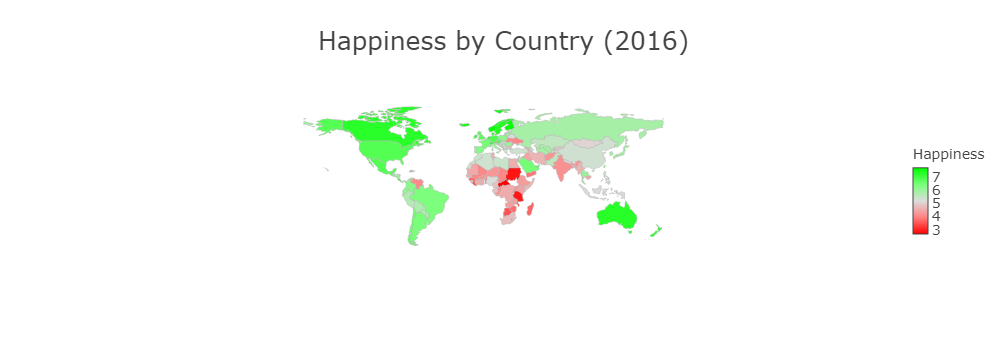

In [42]:
data = [dict(type='choropleth', locations=data_heatmap['country_code'], z=data_heatmap['happiness'],
             text=data_heatmap['country'],
             colorscale=[[0, "rgb(0, 255, 0)"], [0.25, "rgb(122, 255, 122)"],
                         [0.5, "rgb(220, 220, 220)"], [0.75, "rgb(255, 128, 128)"],
                         [1, "rgb(255, 0, 0)"]],
             autocolorscale=False, reversescale=True,
             marker=dict(line=dict(color='rgb(180, 180, 180)', width=0.5)),
             colorbar=dict(autotick=False, title='Happiness', thickness=15, len=0.6, 
                           tickfont=dict(size=14), titlefont=dict(size=14)),)]
layout = dict(title='Happiness by Country (2016)', font=dict(size=18),
              geo=dict(showframe=False, showcoastlines=False,
                       projection=dict(type='Mercator')))
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world-heatmap')

#### From this heatmap, people in North America, Australia, New Zealand, Western Europe are the happiest, followed by Latin America. People in Africa have the lowest happiness score in general.

#### Noteworthy is that the low happiness scores for Venezuela and Haiti stand out among Latin American countries. Yet, this is not surprising because Venezuela has been suffering from hyperinflation (inflation rate >4000%) for years and Haiti is very vulnerable to natural disasters (Ref: 2,3).

In [45]:
data_2016['gdp_per_cap'] = np.exp(data_2016['log_gdp_per_cap'])

In [47]:
data_gdp = data_2016[['region', 'happiness', 'gdp_per_cap', 'country']]
region = data_2016['region']

In [49]:
## Prepare the data for the right format for charting
data_gdp2 = pd.get_dummies(data_gdp['region'])

In [51]:
data_gdp = pd.concat([data_gdp, data_gdp2], axis=1)

In [53]:
region = data_gdp2.columns

In [55]:
for a in region:
    data_gdp[a + '_happiness'] = data_gdp[a] * data_gdp['happiness']
    data_gdp[a + '_gdp_per_cap'] = data_gdp[a] * data_gdp['gdp_per_cap']
    data_gdp[a + '_country'] = data_gdp[a] * data_gdp['country']

In [57]:
data_gdp.replace(0, np.nan, inplace=True)

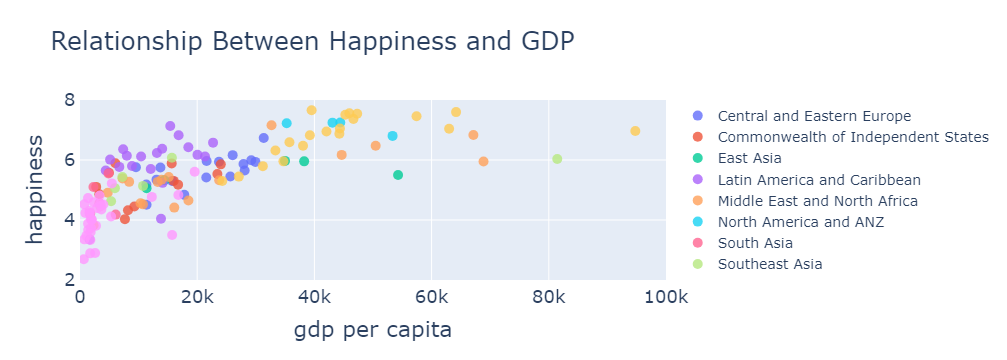

In [59]:
trace = [go.Scatter(y=data_gdp[a + '_happiness'], x=data_gdp[a + '_gdp_per_cap'],
                    text=data_gdp[a + '_country'], mode='markers', 
                    marker=dict(size=10, opacity=0.8), name=a) for a in region]
data = trace
layout = go.Layout(title='Relationship Between Happiness and GDP', font=dict(size=18),
                   yaxis=dict(title='happiness', range=[2, 8], showline=True),
                   xaxis=dict(title='gdp per capita', range=[0, 100000], showline=True), 
                   legend=dict(font=dict(size=14)))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [64]:
data_social = data_2016[['region', 'happiness', 'social_support', 'country']]

In [66]:
data_social2 = pd.get_dummies(data_social['region'])

In [68]:
data_social = pd.concat([data_social, data_social2], axis=1)

In [70]:
for a in region:
    data_social[a + '_happiness'] = data_social[a] * data_social['happiness']
    data_social[a + '_social_support'] = data_social[a] * data_social['social_support']
    data_social[a + '_country'] = data_social[a] * data_social['country']

In [72]:
data_social.replace(0, np.nan, inplace=True)

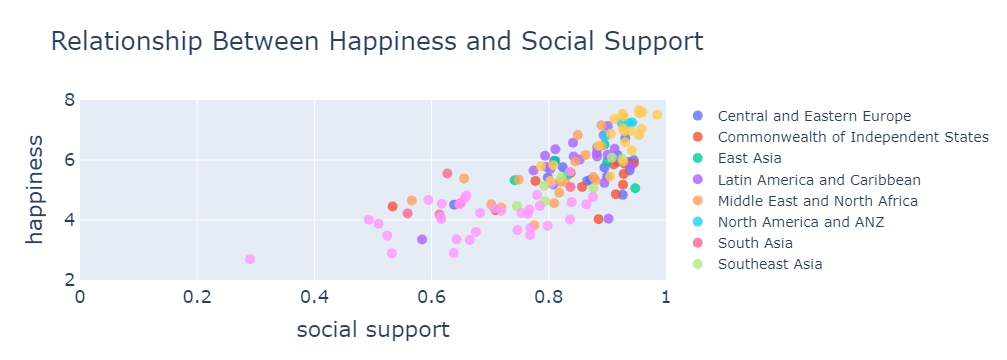

In [74]:
trace = [go.Scatter(y=data_social[a + '_happiness'], x=data_social[a + '_social_support'],
                     text=data_social[a + '_country'], mode='markers', marker=dict(size=10, opacity=0.8), 
                     name=a) for a in region]
data = trace
layout = go.Layout(title='Relationship Between Happiness and Social Support', 
                    font=dict(size=18), 
                    yaxis=dict(title='happiness', range=[2, 8], showline=True),
                    xaxis=dict(title='social support', range=[0, 1], showline=True), 
                    legend=dict(font=dict(size=14)))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)